# 一、导入数据

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel("input/data_.xlsx",index_col=0)

In [3]:
data_ = data.copy()
data_

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big,Thickness_class,Cell Size
ID,,,,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,2,1,0,0,medium,small
1193683,1,1,2,1,3,1,1,1,1,2,1,1,0,0,thin,small
1170419,10,10,10,8,2,10,4,1,1,4,3,0,0,1,thick,big
1190386,4,6,6,5,7,6,7,7,3,4,2,0,1,0,medium,medium
1202125,4,1,1,1,2,1,3,1,1,2,2,1,0,0,medium,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,2,1,1,0,0,thin,small
1116132,6,3,4,1,5,2,3,9,1,4,2,1,0,0,medium,small
1133136,3,1,1,1,2,3,3,1,1,2,1,1,0,0,thin,small


In [4]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 1275807 to 1206314
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              645 non-null    int64 
 1   Uniformity of Cell Size      645 non-null    int64 
 2   Uniformity of Cell Shape     645 non-null    int64 
 3   Marginal Adhesion            645 non-null    int64 
 4   Single Epithelial Cell Size  645 non-null    int64 
 5   Bare Nuclei                  645 non-null    int64 
 6   Bland Chromatin              645 non-null    int64 
 7   Normal Nucleoli              645 non-null    int64 
 8   Mitoses                      645 non-null    int64 
 9   Class                        645 non-null    int64 
 10  Thickness_classnum           645 non-null    int64 
 11  Cell Size _small             645 non-null    int64 
 12  Cell Size _medium            645 non-null    int64 
 13  Cell Size _big               6

# 二、设置变量

In [5]:
features = data_.drop(columns=['Class','Thickness_class','Cell Size'])
features

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Thickness_classnum,Cell Size _small,Cell Size _medium,Cell Size _big
ID,,,,,,,,,,,,,
1275807,4,2,4,3,2,2,2,1,1,2,1,0,0
1193683,1,1,2,1,3,1,1,1,1,1,1,0,0
1170419,10,10,10,8,2,10,4,1,1,3,0,0,1
1190386,4,6,6,5,7,6,7,7,3,2,0,1,0
1202125,4,1,1,1,2,1,3,1,1,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493452,1,1,3,1,2,1,1,1,1,1,1,0,0
1116132,6,3,4,1,5,2,3,9,1,2,1,0,0
1133136,3,1,1,1,2,3,3,1,1,1,1,0,0


In [6]:
target = data_.Class.replace(to_replace = [2, 4], value = [0,1])
target

ID
1275807    0
1193683    0
1170419    1
1190386    1
1202125    0
          ..
493452     0
1116132    1
1133136    0
1158247    0
1206314    0
Name: Class, Length: 645, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
transfer = StandardScaler()

In [9]:
features_ = transfer.fit_transform(features)

In [10]:
features_

array([[-0.17231198, -0.39676889,  0.23516391, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.43303311, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [ 1.93130744,  2.20136243,  2.23975499, ..., -1.60727513,
        -0.47319015,  3.06646797],
       ...,
       [-0.52291521, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.72153531, -0.76713162, ...,  0.62217102,
        -0.47319015, -0.32610809],
       [-1.22412169, -0.39676889, -0.0989346 , ...,  0.62217102,
        -0.47319015, -0.32610809]])

# 三、拆分数据集

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_features, test_features, train_target, test_target = train_test_split(
    features, target, 
    test_size = 145, random_state = 99)

In [13]:
print(train_features.shape)
print(train_target.shape)
print(test_features.shape)
print(test_target.shape)

(500, 13)
(500,)
(145, 13)
(145,)


# 四、交叉验证

In [14]:
from sklearn.model_selection import KFold,ShuffleSplit,cross_val_score

In [15]:
kf = KFold(n_splits=10)

In [16]:
ss = ShuffleSplit(n_splits=10, test_size=0.2, random_state=99)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [18]:
log_clf = LogisticRegression()
svc_clf = SVC()
tree_clf = DecisionTreeClassifier()

In [19]:
log_score = cross_val_score(log_clf, train_features, train_target, cv=ss)
log_score

array([0.98, 0.98, 0.96, 0.97, 0.96, 0.93, 0.94, 0.99, 0.97, 0.98])

In [20]:
svc_score = cross_val_score(svc_clf, train_features, train_target, cv=ss)
svc_score

array([0.97, 0.98, 0.97, 0.98, 0.94, 0.93, 0.95, 0.98, 0.96, 0.98])

In [21]:
tree_score = cross_val_score(tree_clf, train_features, train_target, cv=ss)
tree_score

array([0.9 , 0.95, 0.95, 0.97, 0.9 , 0.9 , 0.9 , 0.98, 0.93, 0.96])

In [22]:
print(log_score.mean())
print(svc_score.mean())
print(tree_score.mean())

0.966
0.9640000000000001
0.9339999999999999


# 五、网格搜索

In [23]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [24]:
param_grid = {'C': [0.1, 1, 10],'gamma': [0.1, 0.5, 1, 5]}

In [25]:
grid_research = GridSearchCV(svc_clf, param_grid, cv=ss)

In [26]:
grid_research.fit(train_features, train_target)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=99, test_size=0.2, train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.5, 1, 5]})

In [27]:
grid_research.best_params_

{'C': 10, 'gamma': 0.1}

In [28]:
grid_research.best_score_

0.9620000000000001

In [29]:
grid_research.best_estimator_

SVC(C=10, gamma=0.1)

In [30]:
param_distributions={'C': np.logspace(-3,3,200),'gamma': np.logspace(-3,3,200), 'kernel': ['linear', 'rbf']}

In [31]:
random_search =RandomizedSearchCV(svc_clf, param_distributions, cv=ss, n_iter=100)

In [32]:
random_search.fit(train_features, train_target)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=99, test_size=0.2, train_size=None),
                   estimator=SVC(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-03, 1.07189132e-03, 1.14895100e-03, 1.23155060e-03,
       1.32008840e-03, 1.41499130e-03, 1.51671689e-03, 1.62575567e-03,
       1.74263339e-03, 1.86791360e-03, 2.00220037e-03, 2.14614120e-03,
       2.30043012e-03, 2....
       2.02550194e+02, 2.17111795e+02, 2.32720248e+02, 2.49450814e+02,
       2.67384162e+02, 2.86606762e+02, 3.07211300e+02, 3.29297126e+02,
       3.52970730e+02, 3.78346262e+02, 4.05546074e+02, 4.34701316e+02,
       4.65952567e+02, 4.99450512e+02, 5.35356668e+02, 5.73844165e+02,
       6.15098579e+02, 6.59318827e+02, 7.06718127e+02, 7.57525026e+02,
       8.11984499e+02, 8.70359136e+02, 9.32930403e+02, 1.00000000e+03]),
                                        'kernel': ['linear', 'rbf']})

In [33]:
random_search.best_params_

{'kernel': 'linear', 'gamma': 82.14343584919422, 'C': 14.481182276745331}

In [34]:
random_search.best_score_

0.968

In [35]:
random_search.best_estimator_

SVC(C=14.481182276745331, gamma=82.14343584919422, kernel='linear')

In [36]:
random_search.best_estimator_.score(test_features, test_target)

0.9793103448275862

# 六、知识拓展

In [37]:
Cs = np.logspace(-3,2,200)

In [38]:
acc_=[]
coef_ = []
for C_ in Cs:
    log_l1 = LogisticRegression(penalty='l1',C = C_, solver='liblinear')
    log_l1.fit(train_features, train_target)
    coef_.append(log_l1.coef_)
    score = cross_val_score(log_l1, train_features, train_target, cv=ss)
    acc_.append(score.mean())

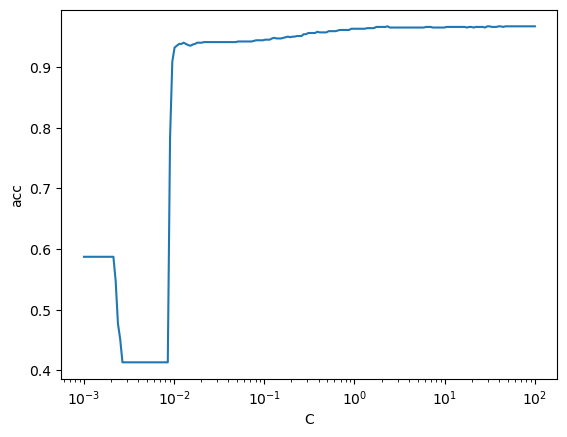

In [39]:
import matplotlib.pyplot as plt
plt.plot(Cs, acc_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('acc')
plt.show()

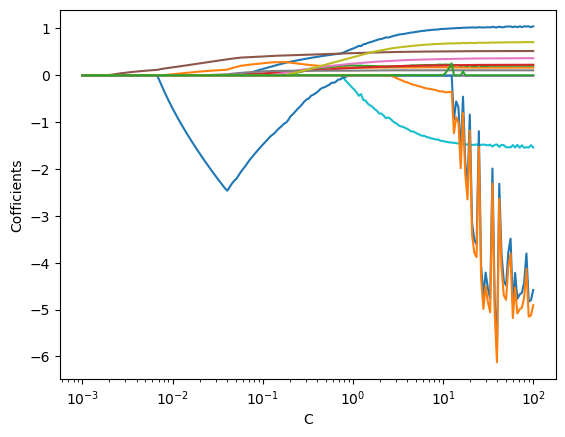

In [40]:
coef_ = np.array(coef_).reshape(200,13)
plt.plot(Cs, coef_)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Cofficients')
plt.show()

In [41]:
np.argmax(acc_)

134

In [42]:
Cs[134]

2.3272024789604098

In [43]:
print('test')

test
